In [1]:
pip install scikit-learn matplotlib pillow transformers torch torchvision numpy

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 162.9 kB/s eta 0:00:00m eta 0:00:010:00:03
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


Cosine Similarity: 1.0000
✅ Genuine Signature


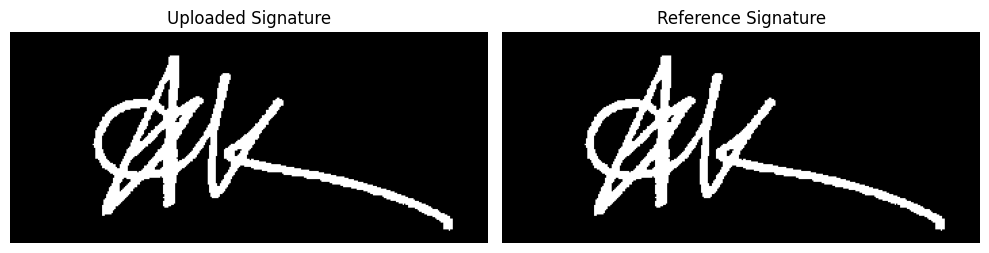

In [6]:
# Cell 1: Imports and Setup
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Cell 2: Define CNN Model
class SignatureCNN(nn.Module):
    def __init__(self):
        super(SignatureCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64 * 32 * 32, 256)

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

# Cell 3: Image Preprocessing Function
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

def image_to_vector(model, image_path):
    image = Image.open(image_path).convert("RGB")
    tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(tensor)
    return embedding.squeeze().numpy()

# Cell 4: Similarity Comparison Function
def compare_vectors(vec1, vec2):
    vec1 = np.array(vec1).reshape(1, -1)
    vec2 = np.array(vec2).reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]
    return similarity

# Cell 5: Simulate DB Fetch (Dummy Vector)
def get_vector_from_database(account_id):
    return image_to_vector(model, "/content/anik_bank.png")

# Cell 6: Load Model and Evaluate
model = SignatureCNN()
model.eval()

# Load uploaded and stored signature images
uploaded_vec = image_to_vector(model, "/content/anik_check.png")
stored_vec = get_vector_from_database(account_id="123456")

# Compare
similarity = compare_vectors(uploaded_vec, stored_vec)
print(f"Cosine Similarity: {similarity:.4f}")

if similarity >= 0.85:
    print("Genuine Signature")
else:
    print("Forged Signature")

# Cell 7: Visualize both images
uploaded_img = Image.open("/content/anik_check.png")
stored_img = Image.open("/content/anik_bank.png")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(uploaded_img, cmap='gray')
axs[0].set_title("Uploaded Signature")
axs[0].axis('off')

axs[1].imshow(stored_img, cmap='gray')
axs[1].set_title("Reference Signature")
axs[1].axis('off')

plt.tight_layout()
plt.show()



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
with open('/content/drive/MyDrive/anik_check.png', 'w') as f:
    f.write('This is safe')

In [1]:
# Cell 1: Imports and Setup
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Cell 2: Define CNN Model
class SignatureCNN(nn.Module):
    def __init__(self):
        super(SignatureCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64 * 32 * 32, 256)

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

# Cell 3: Image Preprocessing Function
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

def image_to_vector(model, image_path):
    image = Image.open(image_path).convert("RGB")
    tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(tensor)
    return embedding.squeeze().numpy()

# Cell 4: Similarity Comparison Function
def compare_vectors(vec1, vec2):
    vec1 = np.array(vec1).reshape(1, -1)
    vec2 = np.array(vec2).reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]
    return similarity

# Cell 5: Simulate DB Fetch (Dummy Vector)
def get_vector_from_database(account_id):
    return image_to_vector(model, "/content/anik_bank.png")

# Cell 6: Load Model and Evaluate
model = SignatureCNN()
model.eval()

# Load uploaded and stored signature images
uploaded_vec = image_to_vector(model, "/content/anik_check.png")
stored_vec = get_vector_from_database(account_id="123456")

# Compare
similarity = compare_vectors(uploaded_vec, stored_vec)
print(f"Cosine Similarity: {similarity:.4f}")

if similarity >= 0.85:
    print("Genuine Signature")
else:
    print("Forged Signature")

# Cell 7: Visualize both images
uploaded_img = Image.open("/content/anik_clean_signature.png")
stored_img = Image.open("/content/anik_forged_signature.png")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(uploaded_img, cmap='gray')
axs[0].set_title("Uploaded Signature")
axs[0].axis('off')

axs[1].imshow(stored_img, cmap='gray')
axs[1].set_title("Reference Signature")
axs[1].axis('off')

plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/anik_check.png'